In [1]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from keras import layers

In [2]:
filePath = 'normalized_data_general_energy.csv'

data = pd.read_csv(filePath, header=0)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

df = data

In [3]:
df = df.drop(['biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'low_carbon_electricity', 'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity'], axis = 1)

test2 = df[10:30]['electricity']
test1 = df[10:30].drop(['electricity'], axis = 1)
#drop the rows
df = df.drop(df.index[10:30])

X = df.drop(['electricity'], axis = 1)  # Atributele (features) sau iesirea asteptata
y = df['electricity']

#data = pd.read_csv('normalized_data.csv', header=0)
#X = data.drop(['biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'low_carbon_electricity', 'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity'], axis = 1)
#y = data[['biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'low_carbon_electricity', 'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity']]

In [6]:
#test
"""
X = data.drop(['electricity'], axis=1)  # All input features
y = data['electricity']

# Perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Scale all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model

input_explicit = Input(shape=(3,), name='explicit_input')  # For year, country, gdp
input_blackbox = Input(shape=(X_train_scaled.shape[1] - 3,), name='blackbox_input')  # All other features

# Hidden layers for blackbox features
blackbox_hidden = Dense(32, activation='relu')(input_blackbox)
blackbox_hidden = Dense(16, activation='relu')(blackbox_hidden)

# Combine explicit and blackbox inputs
combined = Concatenate()([input_explicit, blackbox_hidden])

# Further processing
hidden = Dense(64, activation='relu')(combined)
hidden = Dropout(0.2)(hidden)
output = Dense(1, activation='linear', name='output')(hidden)

# Create the model
model = Model(inputs=[input_explicit, input_blackbox], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

explicit_columns = ['year', 'country', 'gdp']
blackbox_columns = [col for col in X.columns if col not in explicit_columns]

X_train_explicit = X_train_scaled[:, :3]  # First 3 columns: year, country, gdp
X_train_blackbox = X_train_scaled[:, 3:]  # Remaining columns
X_test_explicit = X_test_scaled[:, :3]
X_test_blackbox = X_test_scaled[:, 3:]

# Train the model
history = model.fit(
    [X_train_explicit, X_train_blackbox],
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2
)

new_input_explicit = scaler.transform([[2025, 100, 50000]])[:, :3]  # Provide only explicit inputs
new_input_blackbox = np.zeros((1, len(blackbox_columns)))  # Placeholder for blackbox input

prediction = model.predict([new_input_explicit, new_input_blackbox])
print("Predicted Electricity:", prediction)
"""

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 31415220.0000 - mae: 1499.2158 - val_loss: 28648554.0000 - val_mae: 1488.6060
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 30070612.0000 - mae: 1467.6119 - val_loss: 26559370.0000 - val_mae: 1684.5723
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 26527970.0000 - mae: 1900.6270 - val_loss: 22517254.0000 - val_mae: 2260.3579
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 21849216.0000 - mae: 2229.1636 - val_loss: 16960626.0000 - val_mae: 1846.6368
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15258546.0000 - mae: 1675.5698 - val_loss: 9013947.0000 - val_mae: 1114.5355
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8233180.5000 - mae: 1003.5455 - val_loss: 3828101.7500 - val_mae: 687.6013
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2375396.0000 - mae: 564.1579 - val_loss: 2021439.7500 - val_mae: 474.5582
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - los

d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but MinMaxScaler is expecting 128 features as input.

In [7]:
"""
explicit_columns = ['year', 'country', 'gdp']
blackbox_columns = [col for col in X.columns if col not in explicit_columns]

# Fit scalers on explicit and blackbox features separately
scaler_explicit = MinMaxScaler()
scaler_blackbox = MinMaxScaler()

# Scale the explicit features
X_train_explicit = scaler_explicit.fit_transform(X_train[explicit_columns])
X_test_explicit = scaler_explicit.transform(X_test[explicit_columns])

# Scale the blackbox features
X_train_blackbox = scaler_blackbox.fit_transform(X_train[blackbox_columns])
X_test_blackbox = scaler_blackbox.transform(X_test[blackbox_columns])

history = model.fit(
    [X_train_explicit, X_train_blackbox],
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2
)

# Example input for prediction
new_input_explicit = pd.DataFrame({'year': [2025], 'country': [100], 'gdp': [50000]})

# Scale explicit input
new_input_explicit_scaled = scaler_explicit.transform(new_input_explicit)

# Use zeros for blackbox input (placeholder)
new_input_blackbox_placeholder = np.zeros((1, X_train_blackbox.shape[1]))

# Predict electricity
prediction = model.predict([new_input_explicit_scaled, new_input_blackbox_placeholder])
print("Predicted Electricity:", prediction)

"""

Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 309100.1250 - mae: 215.4344 - val_loss: 193165.9062 - val_mae: 197.5894
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 318275.0938 - mae: 222.3621 - val_loss: 171945.1250 - val_mae: 176.7221
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 529340.9375 - mae: 239.3114 - val_loss: 130664.3281 - val_mae: 161.7710
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 489977.4375 - mae: 235.7182 - val_loss: 123054.7891 - val_mae: 165.0133
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 372336.6875 - mae: 229.0851 - val_loss: 108520.7422 - val_mae: 165.4176
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 373128.8125 - mae: 221.6781 - val_loss: 101567.1094 - val_mae: 150.5069
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 392675.1875 - mae: 217.3948 - val_loss: 96776.7344 - val_mae: 146.0405
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 310984.7188 - mae

In [ ]:
explicit_columns = ['year', 'country']
blackbox_columns = [col for col in data.columns if col not in explicit_columns + ['electricity']]

X_explicit = data[explicit_columns]
X_blackbox = data[blackbox_columns]
y = data['electricity']

from sklearn.preprocessing import MinMaxScaler

scaler_explicit = MinMaxScaler()
scaler_blackbox = MinMaxScaler()

X_explicit_scaled = scaler_explicit.fit_transform(X_explicit)
X_blackbox_scaled = scaler_blackbox.fit_transform(X_blackbox)

X_scaled = np.hstack([X_explicit_scaled, X_blackbox_scaled])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

model.save('model.h5')

new_input_explicit = pd.DataFrame({'year': [2021], 'country': [0]})

new_input_explicit_scaled = scaler_explicit.transform(new_input_explicit)

default_blackbox = X_blackbox.mean(axis=0).values  # Mean of original blackbox columns
default_blackbox_scaled = scaler_blackbox.transform([default_blackbox])

new_input_combined = np.hstack([new_input_explicit_scaled, default_blackbox_scaled])

prediction = model.predict(new_input_combined)
print("Predicted Electricity:", prediction[0][0])

d:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'Sequential' object has no attribute 'load'

In [4]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

model.save('model.h5')

new_input_explicit = pd.DataFrame({'year': [2021], 'country': [1]})

new_input_explicit_scaled = scaler_explicit.transform(new_input_explicit)

default_blackbox = X_blackbox.mean(axis=0).values  # Mean of original blackbox columns
default_blackbox_scaled = scaler_blackbox.transform([default_blackbox])

new_input_combined = np.hstack([new_input_explicit_scaled, default_blackbox_scaled])

prediction = model.predict(new_input_combined)
print("Predicted Electricity:", prediction)

NameError: name 'model' is not defined

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', bias_initializer=tf.keras.initializers.Constant(value=0.5)),
    tf.keras.layers.Dense(1, activation='softplus'),
    layers.Dropout(0.1)
])

d:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

recall = tf.keras.metrics.Recall(
    thresholds=0.1, top_k=None, class_id=None, name='recall', dtype=None
)

precision = tf.keras.metrics.Precision(
    thresholds=0.9, top_k=None, class_id=None, name='precision', dtype=None
)

f1score = tf.keras.metrics.F1Score(
    average=None, threshold=None, name='f1_score', dtype=None
)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[
    #tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    #precision,
    #tf.keras.metrics.Precision(name='precision'),
    #recall,
    #f1score,
    #tf.keras.metrics.Recall(name='recall'),
    #tf.keras.metrics.F1Score(name='f1'),
    #tf.keras.metrics.AUC(name='auc'),
])

from keras import backend as K
from sklearn.metrics import f1_score

def smooth_f1_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return 1 - f1  # Minimize 1 - F1

"""model.compile(
    optimizer='adam',
    loss=smooth_f1_loss,
    metrics=[
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.F1Score(name='f1'),
    ]
)"""

"model.compile(\n    optimizer='adam',\n    loss=smooth_f1_loss,\n    metrics=[\n        tf.keras.metrics.Precision(name='precision'),\n        tf.keras.metrics.Recall(name='recall'),\n        tf.keras.metrics.F1Score(name='f1'),\n    ]\n)"

In [16]:
print(df)

      country  year  population           gdp  biofuel_cons_change_pct  \
0           0  2000           0  0.000000e+00                      0.0   
1           0  2001           0  0.000000e+00                      0.0   
2           0  2002           0  0.000000e+00                      0.0   
3           0  2003           0  0.000000e+00                      0.0   
4           0  2004           0  0.000000e+00                      0.0   
...       ...   ...         ...           ...                      ...   
8603      305  2017    14751101  2.194784e+10                      0.0   
8604      305  2018    15052191  2.271535e+10                      0.0   
8605      305  2019    15354606  0.000000e+00                      0.0   
8606      305  2020    15669663  0.000000e+00                      0.0   
8607      305  2021    15993525  0.000000e+00                      0.0   

      biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                         0.0   

In [11]:
#set the confidence treshold to 0.5
#model.

history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=64, validation_split=0.2)


#model.evaluate(X_test, y_test)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6270e-04 - val_loss: 1.3189e-04
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1526e-04 - val_loss: 1.4395e-04
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 1.2864e-04
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0924e-04 - val_loss: 1.1981e-04
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5790e-04 - val_loss: 8.9422e-05
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 1.6630e-04
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3767e-04 - val_loss: 6.8216e-05
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5887e-04 - val_loss: 1.6422e-04
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5413e-04 - val_loss: 6.0046e-05
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3216e-04 - val_loss: 1.5555e-04
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9953e-04 - val_loss: 9.377

In [12]:
#test = [[0,2022,0.0,0.0,0.017363136810405657,0.2648431558440206,0.0,0.0,0.0,0.06033324970113789,0.04671771969368184,0.0,0.502734,0.0018018018018018018,0.3572123570612281,0.0,0.0,0.0,0.04780432374191789,0.002218980045821938,0.421424398662496,0.0,0.0,0.39762000000000003,0.0,0.042947641174771525,0.042947641174771525,0.0,0.06049222523675145,0.5910320260056213,0.0,0.0,0.31908269420609003,0.4826276243989242,0.0,0.05041141433924929,0.0,0.0,0.71532,0.0,0.0061866504885112255,0.381789284497512,0.0,0.0,0.05563073031931711,0.0,1.0725911725030932e-16,0.3541162907528028,0.0,0.0,0.28723,0.0,0.04948303702692063,0.04436860068259386,0.39016890828042106,0.0,0.0,0.052811499389555636,0.0,0.18712,0.0,0.011592765128020127,0.22576079641953017,0.0,0.0,0.03130236093697976,0.0,0.28468,0.0,0.5360473208072373,0.8940910202953377,0.008849556738977278,0.4541851243549556,0.0,0.0,0.0,0.0,0.0,0.0,0.04543320143624011,0.641510354744884,0.0,0.0,0.027354317922683932,0.0,0.003763274669149826,0.5582212549460294,0.0,0.0,0.03047,0.0,0.0,0.08907643025305219,0.2843392821335472,0.004710019634187847,0.11614707909352576,0.0,0.0,0.0,0.07911352531884809,0.04783057851239669,0.0,0.0,0.0,0.01217223740231701,0.15948015435501656,0.0,0.0,0.040877484743752475,0.0,0.28468,0.0,0.0099999990000001,0.0072503331630825955,0.0,0.0,0.028954369526941602,0.0,0.076175,0.0,0.00041239690840224225,0.07145757659906701,0.0,0.0,0.006058254605629128,0.0,0.018613652357494723,0.0]]


#test = df[10:30].drop(['electricity'], axis = 1)
test = test1
#test_scaler = scaler.transform(test)
#prediction = model.predict(test)
#print(prediction)

test_scaled = scaler.transform(test)
prediction_scaled = model.predict(test_scaled)
prediction = y_scaler.inverse_transform(prediction_scaled)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1651.0817 ]
 [1673.049  ]
 [1790.5522 ]
 [1931.1522 ]
 [2017.6863 ]
 [2053.2893 ]
 [2234.4749 ]
 [2378.1929 ]
 [2517.3042 ]
 [2630.923  ]
 [2570.6414 ]
 [2741.5503 ]
 [3074.6055 ]
 [ 159.3758 ]
 [ 145.07835]
 [ 184.49289]
 [ 172.76326]
 [ 177.0823 ]
 [ 171.36139]
 [ 161.21375]]


In [13]:
#print(df)
#print(test1)
print(test2)

10    1436.55
11    1529.16
12    1654.42
13    1756.63
14    1850.33
15    1922.45
16    2092.09
17    2225.24
18    2356.05
19    2446.25
20    2446.02
21    2570.95
22    2770.83
23       1.25
24       1.68
25       1.94
26       2.51
27       2.34
28       2.45
29       2.32
Name: electricity, dtype: float64


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[ 169    0]
 [1553    0]]


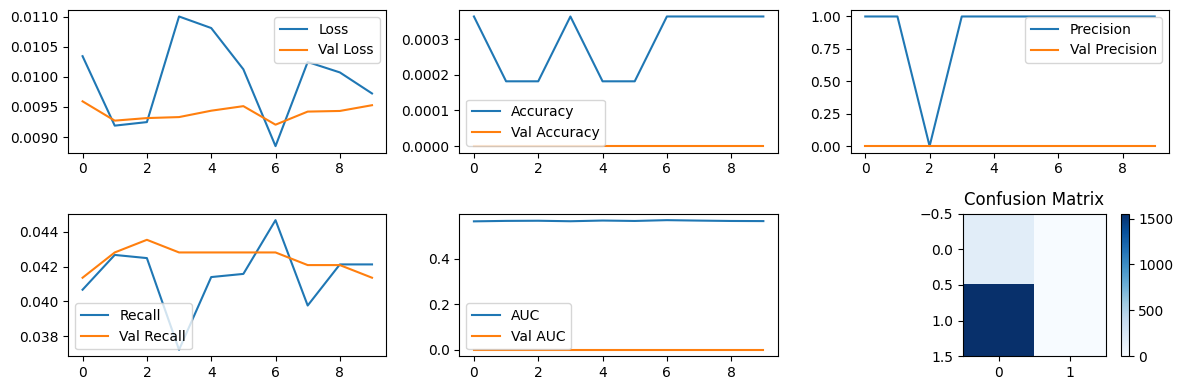

In [153]:
plt.figure(figsize=(12, 4))

plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(history.history['precision'], label='Precision')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(history.history['recall'], label='Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(history.history['auc'], label='AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.legend()

y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.9).astype(int)
y_test = y_test.astype(int)
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)
plt.subplot(2, 3, 6)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')


plt.tight_layout()

plt.show()